In [1]:
from sphviewer.tools import QuickView
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import heapq
from scipy.spatial import cKDTree
import matplotlib as mpl
# from pygadgetreader.readgadget.readgadget import readsnap, readhead, readheader
from pygadgetreader import readsnap, readhead, readheader
# import pygadgetreader
import random

In [2]:
def plot_fer_gas(gas, scale_gas, rotation_matrix, file_id, simulation_name ,z,  r = 'infinity', p = 0,v = [6, 10.5], zoom=1):
    gas_rot = gas.copy()
    # index_gas = kdtree_gas_pos.query_ball_point(centre_pos, scale_gas)
    # gas_rot = gas_rot[index_gas]
    # gas_rot[:, :3] = gas_rot[:, :3] - centre_pos*np.ones(gas_rot[:, :3].shape)
    # gas_random_pos = gas_rot[:, :3]
    gas_rot_pos1 = np.dot(gas_rot[:, :3], rotation_matrix)
    gas_rot_pos1 = gas_rot[gas_rot[:,0]>(-scale_gas)]
    gas_rot_pos1 = gas_rot[gas_rot[:,0]<(+scale_gas)]
    gas_rot_pos1 = gas_rot[gas_rot[:,1]>(-scale_gas)]
    gas_rot_pos1 = gas_rot[gas_rot[:,1]<(+scale_gas)]
    gas_rot_pos1 = gas_rot[gas_rot[:,2]>(-scale_gas)]
    gas_rot_pos1 = gas_rot[gas_rot[:,2]<(+scale_gas)]
    gas_rot_pos2 = np.hstack((np.array([gas_rot_pos1[:,1]]).T, np.array([gas_rot_pos1[:,2]]).T,\
                               np.array([gas_rot_pos1[:,0]]).T))
    # gas_rot_pos3 = np.hstack((np.array([gas_rot_pos1[:,0]]).T, np.array([gas_rot_pos1[:,2]]).T,\
    #                            np.array([gas_rot_pos1[:,1]]).T))
    print(gas_rot_pos2.shape)
    
    # qv_gas = QuickView(pos=gas_random_pos, mass=(gas_rot[:, 3]*10**10), x=0, y=0, z=0, r='infinity', logscale=True, plot=False, nb=8)
    qv_gas1 = QuickView(pos=gas_rot_pos1, mass=(gas_rot[:, 3]*10**10), r=r, plot=False)
    qv_gas2 = QuickView(pos=gas_rot_pos2, mass=(gas_rot[:, 3]*10**10), r=r, plot=False)
    # qv_gas3 = QuickView(pos=gas_rot_pos3, mass=(gas_rot[:, 3]*10**10), x=0, y=0, z=0, r='infinity', logscale=True, plot=False, nb=8)
    
    print(file_id)
    plt.figure(figsize=(10,5.2))
    # plt.subplot(131)
    # img = qv_gas.get_image()
    # extent = qv_gas.get_extent()
    # norm = mpl.colors.Normalize(vmin=v[0], vmax=v[1])
    # plt.title('$Random$')
    # #plt.title('x,y')
    # plt.imshow(img, extent=extent, cmap='gnuplot2',origin='lower',norm=norm)
    # plt.xlim(-scale_gas,scale_gas)
    # plt.ylim(-scale_gas,scale_gas)
    
    plt.subplot(121)
    img = qv_gas1.get_image()
    extent = qv_gas1.get_extent()
    # norm = mpl.colors.Normalize(vmin=v[0], vmax=v[1])
    plt.title('$Face-on$')
    plt.imshow(img, extent=extent, cmap='gnuplot2')
    # plt.xlim(-scale_gas,scale_gas)
    # plt.ylim(-scale_gas,scale_gas)
    #plt.xlabel('$x\ (kpc)$')
    #plt.ylabel('$z\ (kpc)$')
    
    plt.subplot(122)
    img = qv_gas2.get_image()
    extent = qv_gas2.get_extent()
    # norm = mpl.colors.Normalize(vmin=v[0], vmax=v[1])
    plt.title('$Edge-on$')
    plt.imshow(img, extent=extent, cmap='gnuplot2')
    # plt.xlim(-scale_gas,scale_gas)
    # plt.ylim(-scale_gas,scale_gas)
    #plt.xlabel('$y\ (kpc)$')
    #plt.ylabel('$z\ (kpc)$')
    plt.suptitle(simulation_name + ", z=%.3f, phy_dis=%.3fMpc"%(z, scale_gas/(1+z)))

    plt.show()
    # plt.savefig('fer_gas__'+Simulation_name+'.png',dpi=1000)
    
    return 0

In [3]:
def plot_gas(gas, scale_gas, rotation_matrix, file_id, simulation_name ,z,  r = 'infinity', p = 0,v = [4.3, 8.8], zoom=1):
    gas_rot = gas.copy()
    gas_rot[:,:3] = np.dot(gas_rot[:,:3], rotation_matrix)
    gas_index = []
    for i in range(len(gas)):
        if abs(gas_rot[i,0]) < scale_gas and abs(gas_rot[i,1]) < scale_gas and abs(gas_rot[i,2]) < scale_gas:
            gas_index.append(i)
    gas_chosen = gas_rot[gas_index]
    print(len(gas_index))
    gas_rot_pos1 = np.hstack((np.array([gas_chosen[:,1]]).T, np.array([gas_chosen[:,2]]).T,
                                    np.array([gas_chosen[:,0]]).T))
    gas_rot_pos2 = np.hstack((np.array([gas_chosen[:,0]]).T, np.array([gas_chosen[:,1]]).T,
                                    np.array([gas_chosen[:,2]]).T))
    # gas_rot_pos = gas_rot
    print(file_id)
    # sphviewer
    print(gas_rot_pos1.shape)

    # print(np.min)
    qv_1 = QuickView(gas_rot_pos1, mass=gas_chosen[:,3]*(10e10),  r=r, plot=False, zoom=zoom)
    qv_2 = QuickView(gas_rot_pos2, mass=gas_chosen[:,3]*(10e10),  r=r, plot=False, zoom=zoom)
    
    plt.figure(figsize=(10, 5.2))
    norm = mpl.colors.Normalize(vmin=v[0], vmax=v[1])
    
    # imshow
    ax1 = plt.subplot(121)
    img = qv_2.get_image()
    extent = qv_2.get_extent()
    ax1.imshow(img, extent=extent, cmap='gnuplot2',origin='lower',norm=norm)
    ax1.set_title('$Face-on$')

    ax2 = plt.subplot(122)
    img = qv_1.get_image()
    extent = qv_1.get_extent()
    ax2.set_title('$Edge-on$')
    ax2.imshow(img, extent=extent, cmap='gnuplot2',origin='lower',norm=norm)

    plt.suptitle(simulation_name + ", z=%.3f, phy_dis=%.2fMpc"%(z, scale_gas/(1+z)))
    plt.show()
    # plt.close()
    # plt.show()
    return 0

In [4]:
# from 13 satellite
rotation_matrix = np.array([[-0.58925189,  0.3286197 , -0.73809979],\
                           [-0.32955748, -0.9318545 , -0.15178623],\
                           [-0.73768155,  0.15380598,  0.65739611]])
simulation_name = 'zcut7'
scale_subhalo = 100
file_ids = np.loadtxt("data/file_id.txt",dtype=str)
h = 0.6777
i = 199
z = np.loadtxt("z.txt")
file_id = file_ids[i]
tan_225 = 0.41421356237

In [5]:
file_id

'199_z000p000'

In [13]:
gas1 = np.loadtxt("/data/inspur_disk06/userdir/zhaox/%s/gas_data_120kpc/%s.txt"%('zcut7', file_id))
gas2 = np.loadtxt("/data/inspur_disk06/userdir/zhaox/%s/gas_data_120kpc/%s.txt"%('7DM_GAS', file_id))

In [7]:
gas1.shape

(354701, 4)

In [8]:
gas2.shape

(403550, 4)

In [10]:
scale_subhalo = 50/1000
r = scale_subhalo/tan_225
# r = 'infinity'
zoom = 1/tan_225
# zoom = 1
p = 0

# v = [6, 10.5]
# rotation_matrix = np.array([[-0.58925189,  0.3286197 , -0.73809979],\
#                            [-0.32955748, -0.9318545 , -0.15178623],\
#                            [-0.73768155,  0.15380598,  0.65739611]])

rotation_matrix = np.array([[-0.66681059,  0.13506486, -0.73288548],
                            [-0.04041349, -0.98854559, -0.14541102],
                            [-0.74413063, -0.06734315,  0.66463111]])
# v = [4,9]
v=[6,9.5]


(257335, 3)
199_z000p000


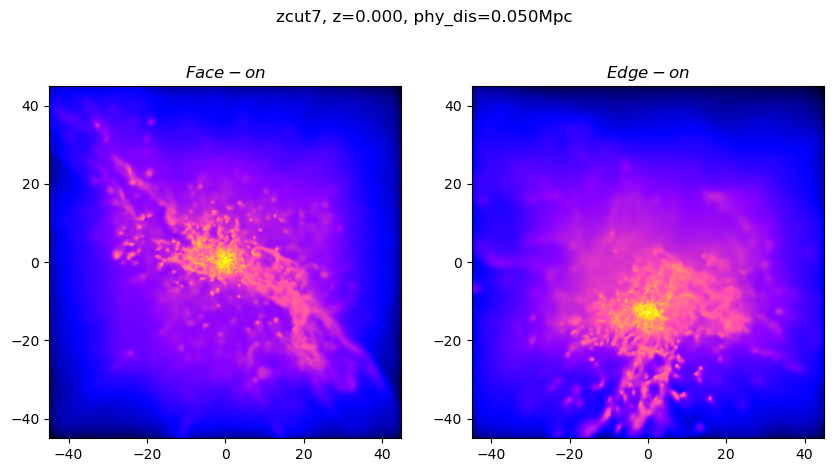

0

In [86]:
plot_fer_gas(gas1/h, scale_subhalo, rotation_matrix, file_id, 'zcut7', z[i] , r = r, p = p, v=v, zoom=zoom)

116696
199_z000p000
(116696, 3)


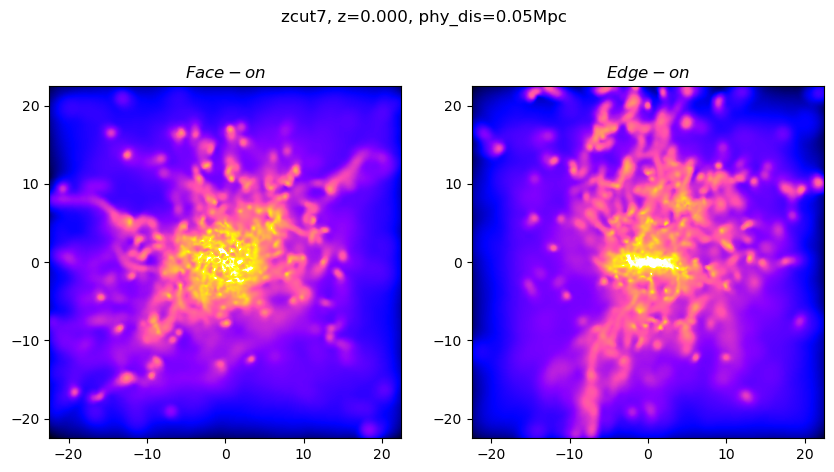

0

In [11]:
plot_gas(gas1/h, scale_subhalo, rotation_matrix, file_id, 'zcut7', z[i] , r = r, p = p, v=v, zoom=zoom)

In [13]:
scale_subhalo = 30/1000
# r = 'infinity'
# r = 'infinity'
r = scale_subhalo/tan_225
zoom = 1/tan_225
# v = [4.3, 8.8]
v=[6,9.5]
# v = [5,15]

rotation_matrix = np.array([[-0.4417713 ,  0.69599792, -0.56606096],
       [ 0.07457423, -0.60029704, -0.79629275],
       [-0.89402282, -0.39399285,  0.2132905 ]])
# rotation_matrix = np.array([[-0.99057662, -0.06704268, -0.11942879],
#        [-0.08730489, -0.36277343,  0.92777869],
#        [-0.10552637,  0.9294626 ,  0.35350173]])

In [72]:
np.min(gas2/h)

-0.11999999730495246

134525
199_z000p000
(134525, 3)


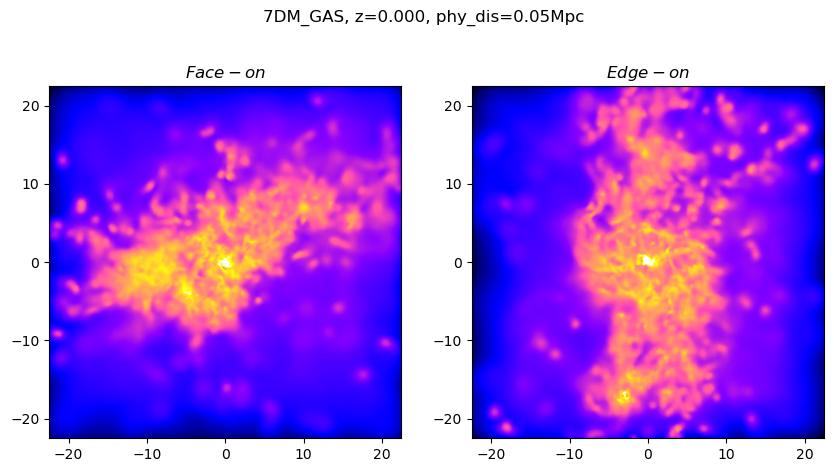

0

In [14]:
# 603.55
#scale_subhalo/tan_225
plot_gas(gas2/h, scale_subhalo, rotation_matrix, file_id, '7DM_GAS', z[i], r = r, p = p, v=v, zoom=zoom)

In [85]:
root = '/home/zhaox/Magpie/M1_zcut7/snapshot_199_z000p000/snap_199_z000p000.0.hdf5'

In [124]:
with h5py.File(root, 'r' ) as hf:
        # data = hf[file]
        print ("root.keys = " , hf.keys())
        # data = hf['PartType0']
        # print(data.keys())
        data = hf['PartType1/Mass'][:]
        

root.keys =  <KeysViewHDF5 ['Config', 'Constants', 'HashTable', 'Header', 'Parameters', 'PartType0', 'PartType1', 'PartType2', 'PartType3', 'PartType4', 'PartType5', 'RuntimePars', 'Units']>


KeyError: "Unable to open object (object 'Mass' doesn't exist)"

In [113]:
data.shape

(1002762,)

In [114]:
data[:10]

array([8.548007e-06, 8.368618e-06, 8.368618e-06, 8.368618e-06,
       8.368618e-06, 8.368618e-06, 8.368618e-06, 8.368618e-06,
       8.368618e-06, 8.368618e-06], dtype=float32)

In [123]:
len(np.where(data-8.548007e-06 > 1e-14)[0])

15545

057_z003p966


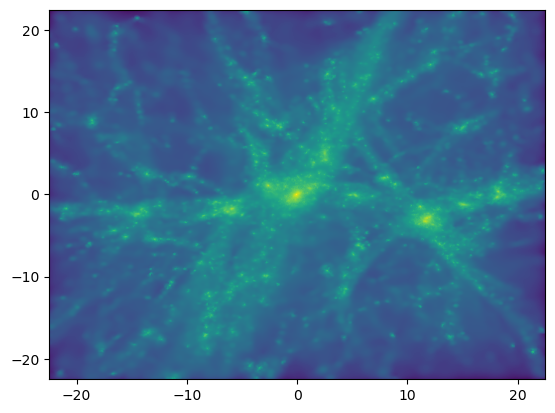

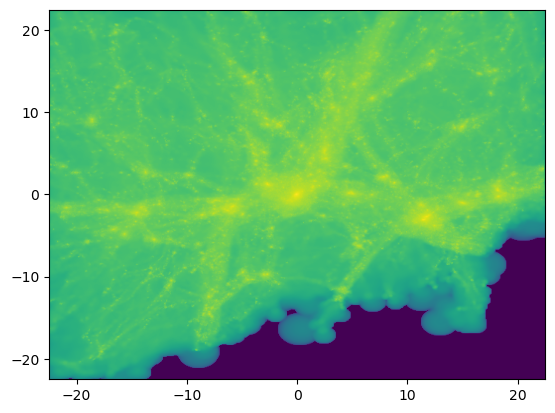

0

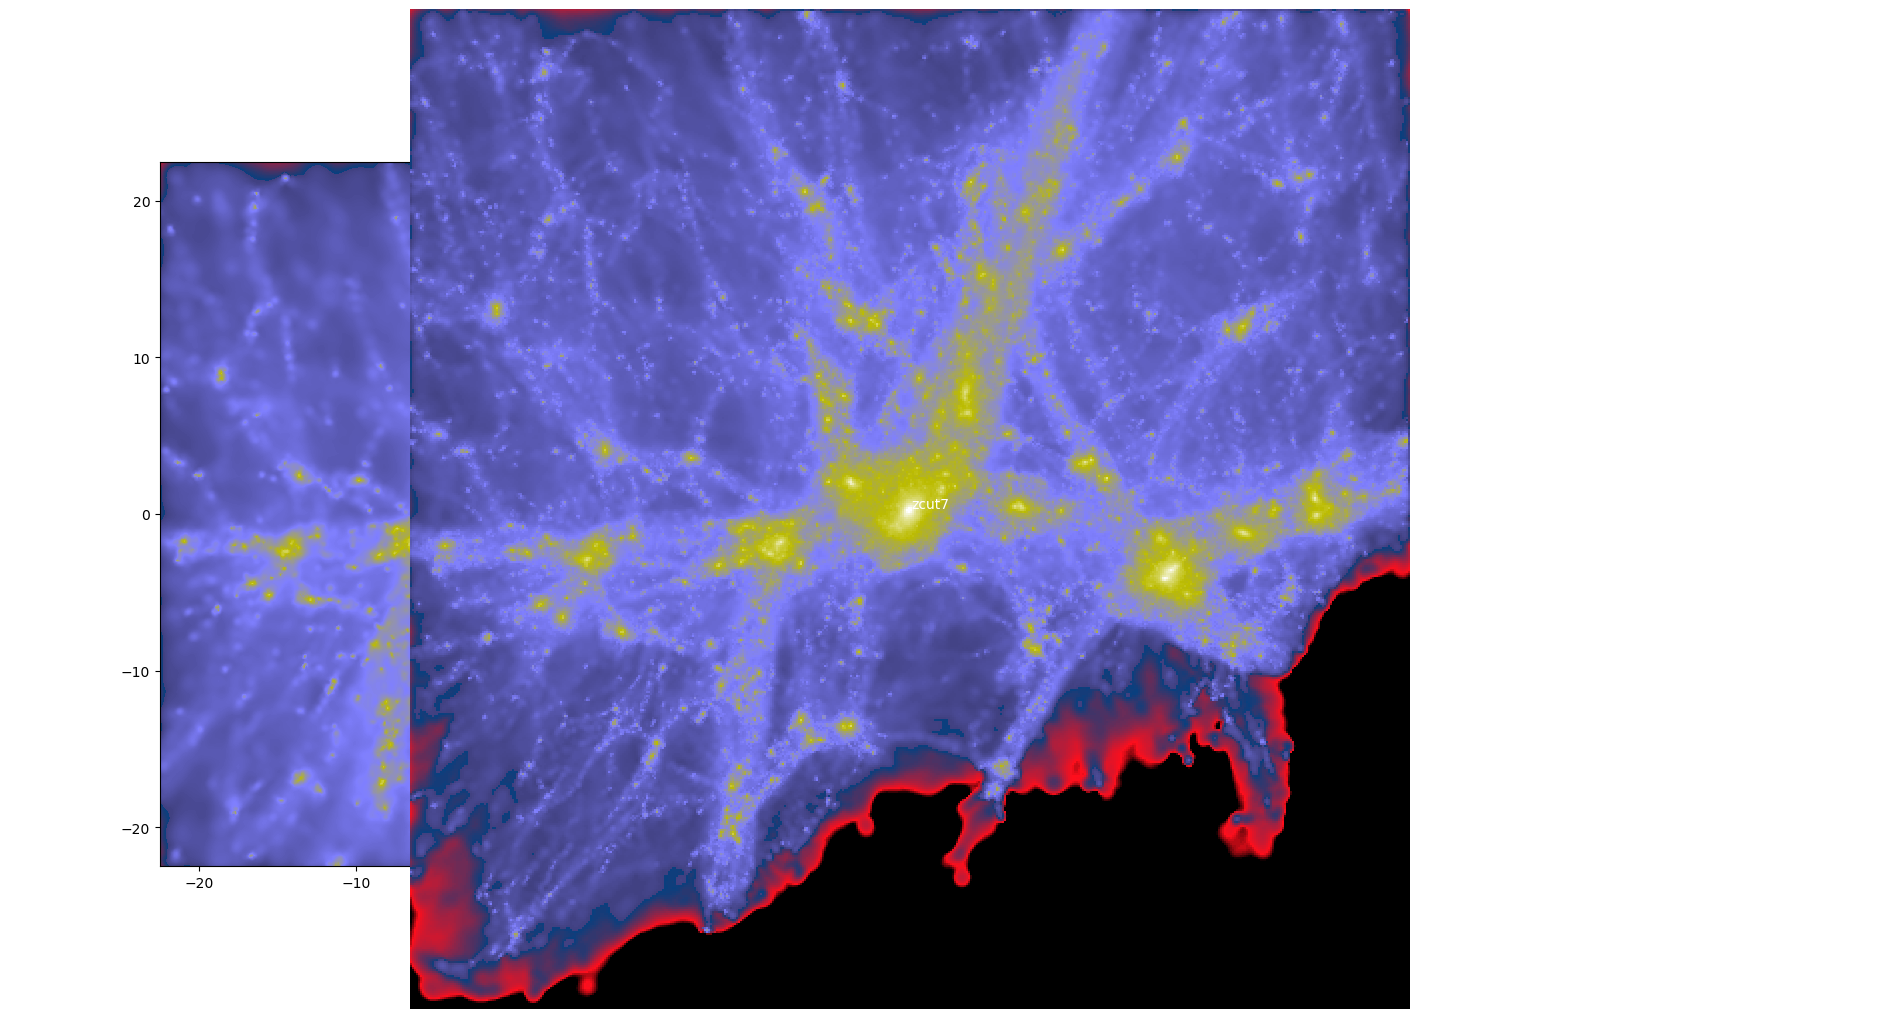

In [ ]:
v = [6, 10.5]
plot_gas_compare(gas1*1000/h, gas2*1000/h, scale_subhalo, rotation_matrix, v, file_id, z[i], r = scale_subhalo/tan_225, p = 0, zoom=1/tan_225)
# plot_gas(gas, scale_subhalo, rotation_matrix, file_id=file_id, p = 0, v=[6, 10.5])

In [13]:
# from 13 satellite
rotation_matrix = np.array([[-0.58925189,  0.3286197 , -0.73809979],\
                           [-0.32955748, -0.9318545 , -0.15178623],\
                           [-0.73768155,  0.15380598,  0.65739611]])
scale_subhalo = 300
for index, file_id in enumerate(file_ids[128:]):
    gas = np.loadtxt("./gas_data/gas_rot_pos"+file_id+".txt")
    p = -0.9 * index + 180
    plot_gas(gas, scale_subhalo, rotation_matrix, file_id=file_id, r = 603.55, p = p, v=[6, 10.5], zoom=2.41421356237)

128_z001p150
129_z001p125
130_z001p099
131_z001p074
132_z001p049
133_z001p024
134_z001p000
135_z000p976
136_z000p952
137_z000p928
138_z000p905
139_z000p882
140_z000p859
141_z000p837
142_z000p815
143_z000p793
144_z000p772
145_z000p750
146_z000p729
147_z000p709
148_z000p689
149_z000p669
150_z000p649
151_z000p630
152_z000p611
153_z000p592
154_z000p573
155_z000p555
156_z000p537
157_z000p520
158_z000p503
159_z000p486
160_z000p469
161_z000p452
162_z000p436
163_z000p420
164_z000p405
165_z000p389
166_z000p374
167_z000p360
168_z000p345
169_z000p331
170_z000p317
171_z000p303
172_z000p289
173_z000p276
174_z000p263
175_z000p250
176_z000p237
177_z000p225
178_z000p213
179_z000p201
180_z000p189
181_z000p177
182_z000p166
183_z000p155
184_z000p144
185_z000p133
186_z000p122
187_z000p112
188_z000p102
189_z000p092
190_z000p082
191_z000p072
192_z000p063
193_z000p053
194_z000p044
195_z000p035
196_z000p026
197_z000p017
198_z000p008
199_z000p000


In [2]:
import imageio
filenames = os.listdir("/home/zhaox/app/gas_pig/gas_pic_1200kpc")
filenames.sort(key=lambda x:float(x[0:3]))
with imageio.get_writer('./gas_gif/gas_evolution_1000kpc.gif', mode='I',duration=0.1) as writer:
    for filename in filenames:
        print(filename)
        image = imageio.imread("/home/zhaox/app/gas_pig/gas_pic_1200kpc/"+filename)
        writer.append_data(image)

004_z015p951.png
005_z015p172.png
006_z014p462.png
007_z013p813.png
008_z013p216.png
009_z012p666.png
010_z012p157.png
011_z011p686.png
012_z011p247.png
013_z010p839.png
014_z010p457.png
015_z010p100.png
016_z009p766.png
017_z009p451.png
018_z009p155.png
019_z008p876.png
020_z008p612.png
021_z008p363.png
022_z008p127.png
023_z007p903.png
024_z007p691.png
025_z007p489.png
026_z007p296.png
027_z007p113.png
028_z006p939.png
029_z006p772.png
030_z006p613.png
031_z006p461.png
032_z006p315.png
033_z006p176.png
034_z006p042.png
035_z005p914.png
036_z005p791.png
037_z005p673.png
038_z005p559.png
039_z005p449.png
040_z005p343.png
041_z005p241.png
042_z005p142.png
043_z005p047.png
044_z004p955.png
045_z004p865.png
046_z004p778.png
047_z004p694.png
048_z004p612.png
049_z004p533.png
050_z004p455.png
051_z004p380.png
052_z004p307.png
053_z004p235.png
054_z004p166.png
055_z004p097.png
056_z004p031.png
057_z003p966.png
058_z003p902.png
059_z003p840.png
060_z003p779.png
061_z003p720.png
062_z003p661.p